In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data exploration
dataset = pd.read_excel('Social_Network_Ads.xlsx')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
print('Different attributes provided in the dataset to find whether people purchase the items by seeing social network ads are...')
print(dataset.columns.values)

Different attributes provided in the dataset to find whether people purchase the items by seeing social network ads are...
['User ID ' 'Gender ' 'Age ' 'EstimatedSalary ' 'Purchased']


In [14]:
# Here, Outcome value 0 means not purchased and 1 means purchased
# Class distribution
dataset.groupby(dataset.columns[-1]).size()

Purchased
0    257
1    143
dtype: int64

In [15]:
# checking the tail of the data

dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [16]:
# describing the dataseta

dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
# getting the info of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   EstimatedSalary   400 non-null    int64 
 4   Purchased         400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


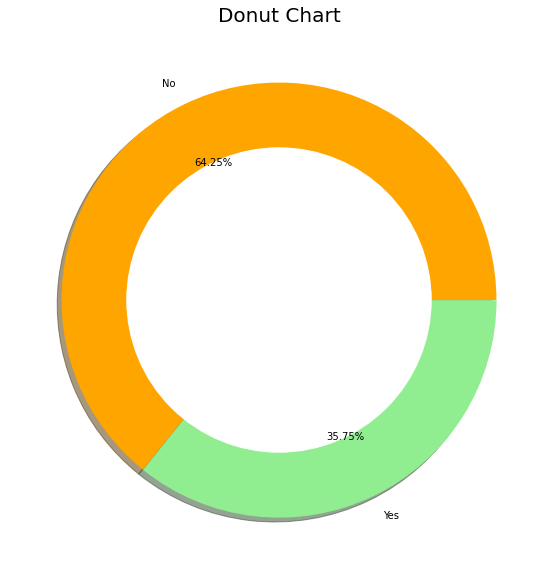

In [18]:
size = [257, 143]
colors = ['orange', 'lightgreen']
explode = [0, 0.001]
labels = 'No','Yes'

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, pctdistance = 0.7, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Chart', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Estimated Salary vs Predicted Purchase by a Customer')

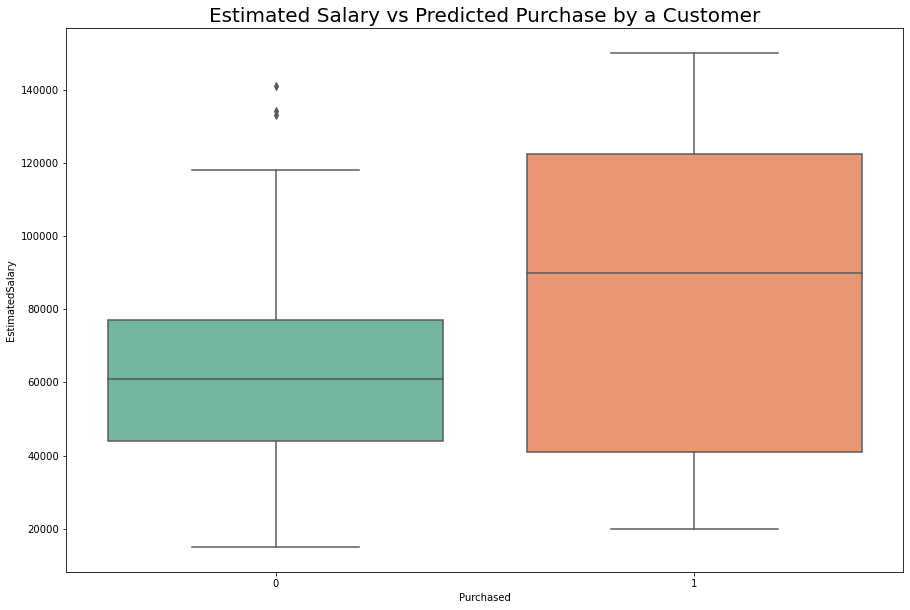

In [19]:
# box plot 

# estimated salary vs predicted

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(dataset['Purchased'], dataset['EstimatedSalary '], palette = 'Set2')
plt.title('Estimated Salary vs Predicted Purchase by a Customer', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Age')

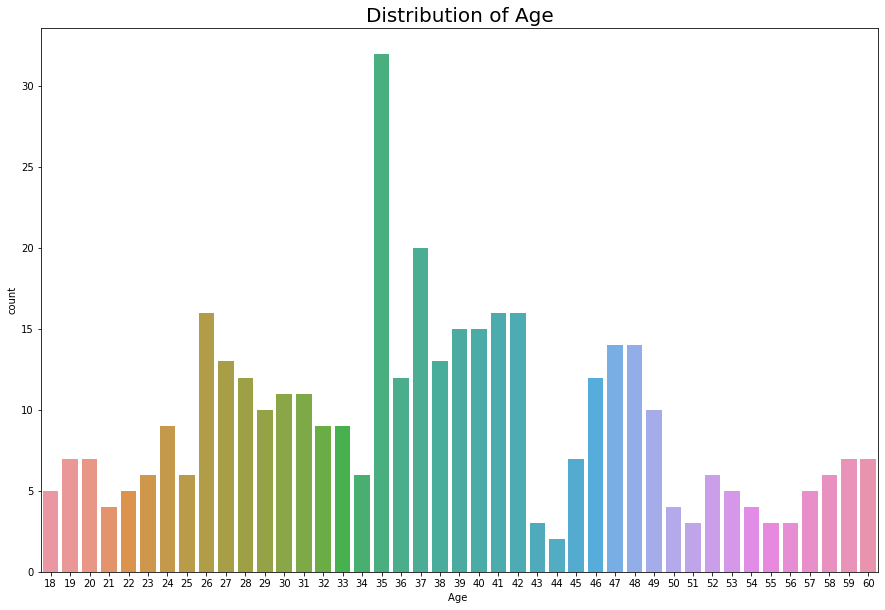

In [20]:
# checking the age of people

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(dataset['Age '])
plt.title('Distribution of Age', fontsize = 20)

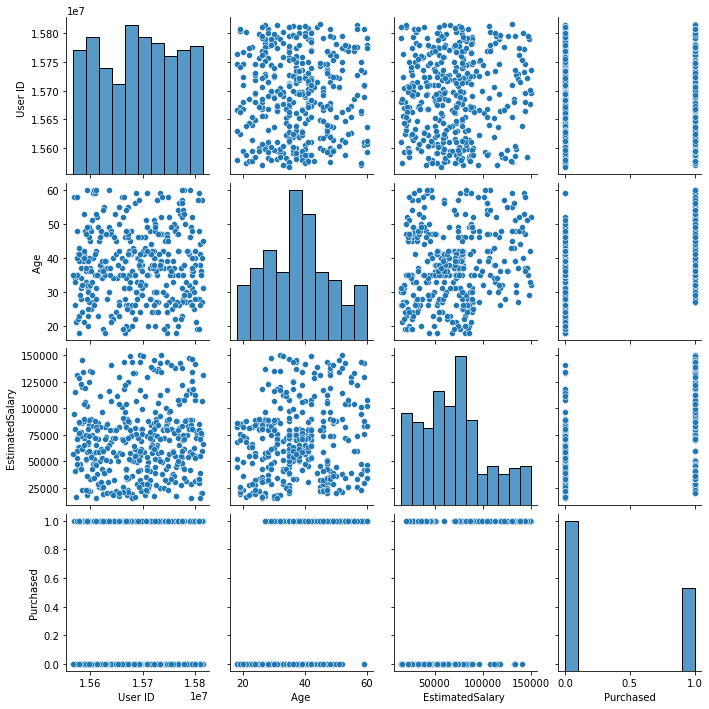

In [21]:
# plotting a pairplot for the data

sns.pairplot(dataset)

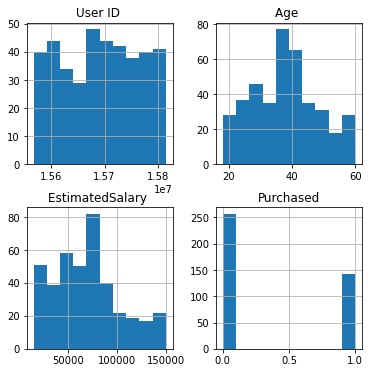

In [22]:
# Data distribution
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

OUTCOME - 0 (is 1st subplot) & OUTCOME - 1 (is 2nd subplot)


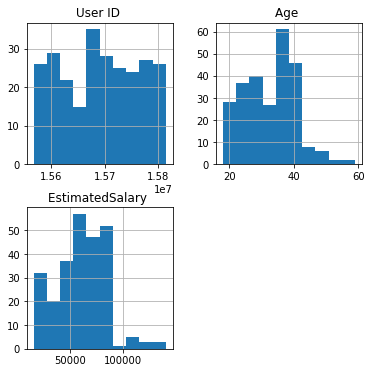

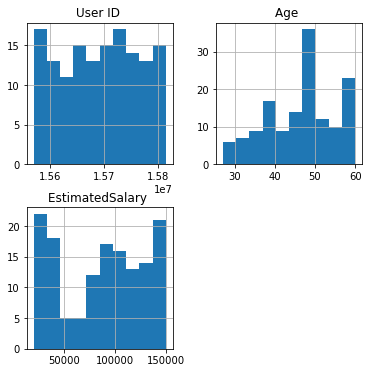

In [23]:
dataset.groupby(dataset.columns[-1]).hist(figsize = (6,6))
print('OUTCOME - 0 (is 1st subplot) & OUTCOME - 1 (is 2nd subplot)')
plt.show()

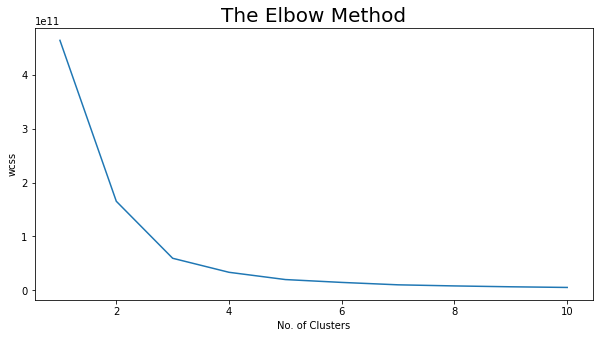

In [24]:
# clustering

x = dataset.iloc[:, [2, 3]].values

# checking the shape  of x
x.shape

# checking the optimum no. of clusters for the dataset

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
# plotting the results

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

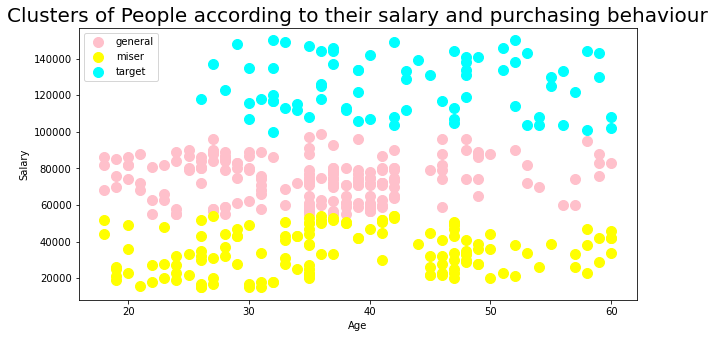

In [25]:
# making clusters

kmeans = KMeans(n_clusters = 3, max_iter = 300,  init = 'k-means++', random_state = 0, n_init = 10)
y_means = kmeans.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')

plt.title('Clusters of People according to their salary and purchasing behaviour',  fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [26]:
# Finding whether any missing values are present in the data
dataset.isna().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [27]:
# Finding whether any null values are present in the data
dataset.isnull().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64

In [28]:
# Outliers
# For social network ads dataset, possible outliers would be attributes value equals to zero. 
# So we would check whether attribute values are zero.
for i in range(2, len(dataset.columns) - 1):
  if(len(dataset.columns[i]) > 12):
    print('Total no. of rows having 0 in ',dataset.columns[i],'is',dataset[dataset[dataset.columns[i]] == 0].shape[0])
  elif(len(dataset.columns[i]) > 5):
    print('Total no. of rows having 0 in ',dataset.columns[i],'is\t  ',dataset[dataset[dataset.columns[i]] == 0].shape[0])
  else:
    print('Total no. of rows having 0 in ',dataset.columns[i],'is\t\t  ',dataset[dataset[dataset.columns[i]] == 0].shape[0])


Total no. of rows having 0 in  Age  is		   0
Total no. of rows having 0 in  EstimatedSalary  is 0


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset[dataset.columns[1]] = le.fit_transform(dataset[dataset.columns[1]])
print(dataset.columns[1])
dataset.head()

Gender 


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [59]:
# Since no attributes have value 0, so there are no outliers in our data.

X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values.reshape(-1,1)

In [62]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [41]:
# Model selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [42]:
# Finding the accuracy of 5 different models
names = []
scores = []

In [43]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

In [44]:
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name  Score
0  KNN   0.93
1   LR   0.89
2   DT   0.91
3  GNB   0.90
4   RF   0.91


In [45]:
# K-Fold cross validation
strat_k_fold = StratifiedKFold(n_splits=10, random_state=0)

names = []
scores = []

  Name   Score
0  KNN  0.7850
1   LR  0.6425
2   DT  0.8325
3  GNB  0.8775
4   RF  0.8800


[Text(0.5, 0, 'Classifier'), Text(0, 0.5, 'Accuracy')]

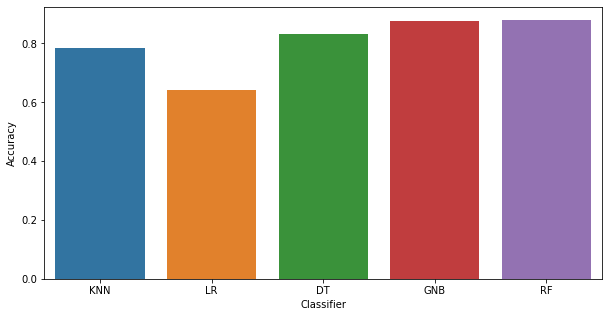

In [46]:
for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

In [63]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [64]:
import math

model = RandomForest(X_train, y_train, n_trees=500, n_features='log2', sample_sz=300, depth=20, min_leaf=1)

y_preds = model.predict(X_test)

RF_acc = sum(y_preds == y_test)/len(y_test)
RF_acc = np.round(RF_acc[RF_acc != 0],3)
print("Testing accuracy: %.3f" %max(RF_acc))

Testing accuracy: 0.680


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Classification Report - \n',classification_report(y_test,y_pred))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



Accuracy Of Our Model - 0.91


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 4 28]]


<AxesSubplot:>

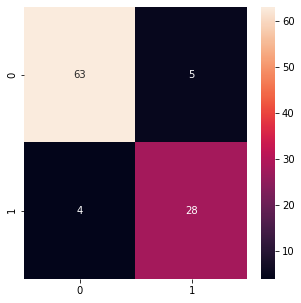

In [48]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


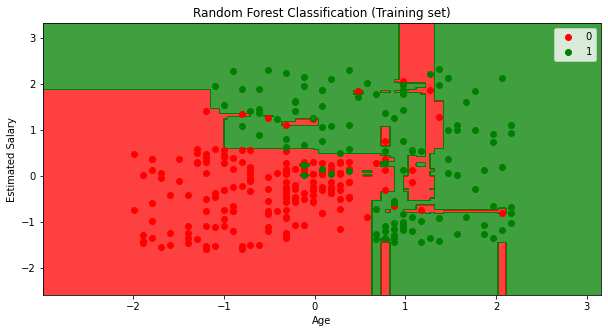

In [39]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


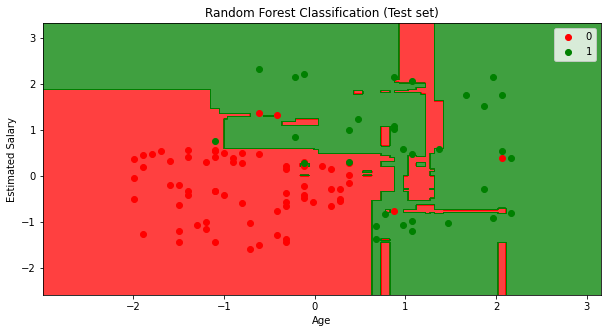

In [40]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()